In [3]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error 

Getting data

In [4]:
independent_features = ['Hour', 'Weekend','Month']
dependent_feature = 'TotalTimeStopped_p50'
data = pd.read_csv(r'C:\Programs\MyPrograms\Python\ML\3K2SML\IT\1\train.csv').dropna().sample(frac=0.1)
data = data[data["Month"] > 6]

train, test = train_test_split(data, test_size=0.3)
print(train.shape)
print(test.shape)

(51241, 28)
(21961, 28)


In [5]:

len(data) - len(data[data["Month"] < 6])

73202

Correlation between features

<AxesSubplot:>

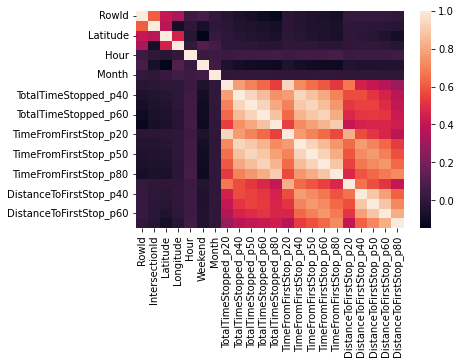

In [6]:
corr = train.corr()
sns.heatmap(corr)

Correlation between features and target variable

In [7]:
corr_with_target = train.corrwith(train[dependent_feature])
print(corr_with_target)

RowId                     -0.078552
IntersectionId            -0.057673
Latitude                  -0.042147
Longitude                 -0.012111
Hour                       0.044122
Weekend                   -0.095530
Month                     -0.000304
TotalTimeStopped_p20       0.698816
TotalTimeStopped_p40       0.935062
TotalTimeStopped_p50       1.000000
TotalTimeStopped_p60       0.928247
TotalTimeStopped_p80       0.800989
TimeFromFirstStop_p20      0.700842
TimeFromFirstStop_p40      0.894030
TimeFromFirstStop_p50      0.933776
TimeFromFirstStop_p60      0.861868
TimeFromFirstStop_p80      0.754261
DistanceToFirstStop_p20    0.522096
DistanceToFirstStop_p40    0.550889
DistanceToFirstStop_p50    0.549196
DistanceToFirstStop_p60    0.487735
DistanceToFirstStop_p80    0.401553
dtype: float64


Scatter plots: feature vs. feature, feature vs. target


features = list(train)[12::2]
sns.pairplot(train[features])
plt.tight_layout()
plt.show()

features_to_plot = list(train)[12:]
target = 'TotalTimeStopped_p50'
sns.pairplot(train[features_to_plot], y_vars=dependent_feature)
plt.tight_layout()
plt.show()

Bar charts for features

<AxesSubplot:xlabel='Month', ylabel='TotalTimeStopped_p50'>

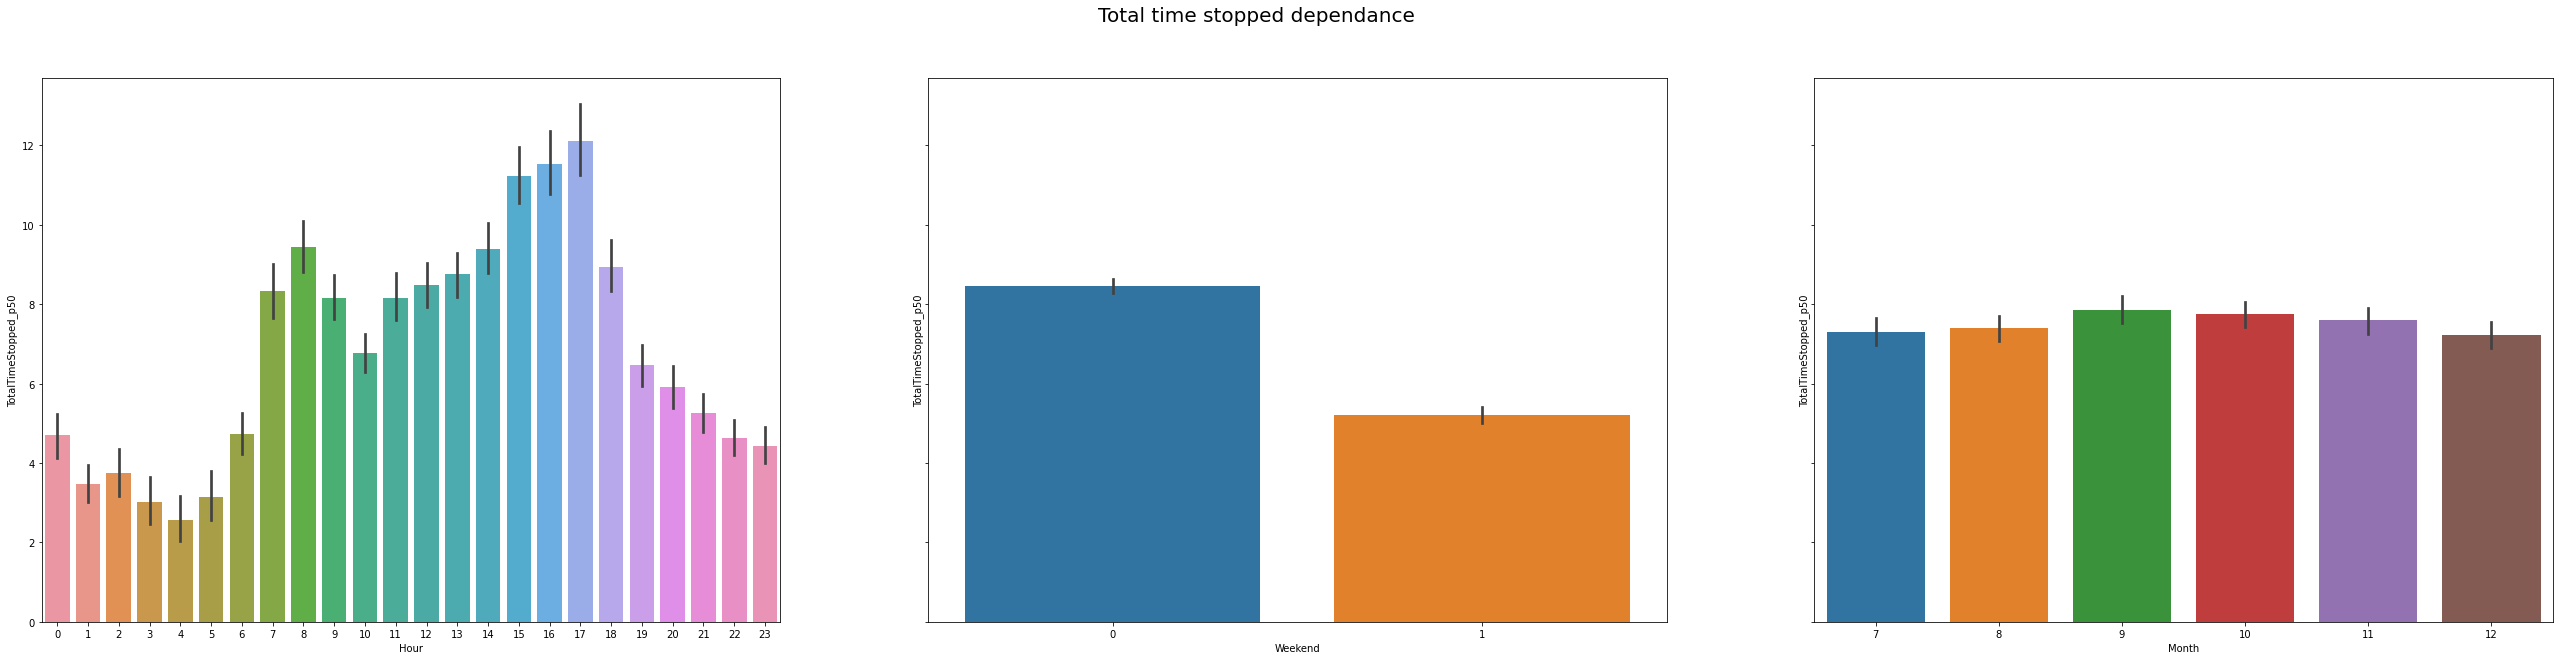

In [8]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(45,10))
fig.suptitle('Total time stopped dependance', fontsize='20')

sns.barplot(data=train, x='Hour', y=dependent_feature, ax=axes[0])
sns.barplot(data=train, x='Weekend', y=dependent_feature, ax=axes[1])
sns.barplot(data=train, x='Month', y=dependent_feature, ax=axes[2])

Custom linear regressor

In [9]:
def normalize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X_new = (X - mean)/std
    return X_new, mean, std

In [10]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [11]:
def hypothesis(X, theta):
    h_theta = np.dot(X, theta)
    return h_theta

In [12]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = sum((hypothesis(X, theta) - y)**2)/(2*m)
    return J

In [13]:
def derivative(X, y, theta):
    m = X.shape[0]
    d_theta = np.dot(hypothesis(X,theta) - y, X) / m
    return d_theta

In [14]:
def gradient_descent(X, y, theta, alpha, max_iter):
    J_history = [cost_function(X, y, theta)]
    for i in range(max_iter):
        delta = derivative(X, y, theta)
        theta = theta - alpha * delta
        J_history.append(cost_function(X, y, theta))
    return theta, J_history

In [15]:
X_train, y_train = train[independent_features].to_numpy(), train[dependent_feature].to_numpy()
X_test, y_test = test[independent_features].to_numpy(), test[dependent_feature].to_numpy()

In [16]:
X_train_normalized, mean, std = normalize(X_train)

In [17]:
X = prepare_X(X_train_normalized)

In [18]:
theta = np.array([0 for _ in range(X_train.shape[1])])

In [19]:
y = y_train[:]

In [20]:
alpha = 10**-3
max_iter = 10000

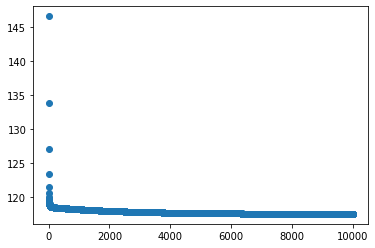

In [21]:
new_theta, Js = gradient_descent(X_train, y_train, theta, alpha, max_iter)
plt.scatter(range(len(Js)),Js)

In [22]:
print(new_theta)

[ 0.16790345 -2.76165396  0.63104308]


In [23]:
def NormalEquation(X, y):
    return np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X), y))

In [24]:
NormalEquation(X_train, y_train)

array([ 0.16895166, -3.18147333,  0.64199798])

Sklearn LinearRegression

In [25]:
reg = LinearRegression()
reg.fit(X_train, y_train)
sklearn_theta = np.concatenate(([reg.intercept_], reg.coef_[1:]))
print(sklearn_theta)
print(cost_function(X_train, y_train, reg.coef_))

[ 6.77122313 -3.30128061  0.0268313 ]
139.83582025789687


Grid/Random Search

In [26]:
...

Ellipsis

Results Evaluation

In [27]:
def MAE(y_, y):
    return 1/len(y) * sum(abs(y_ - y))

In [28]:
def MSE(y_, y):
    return 1/len(y) * sum((y_ - y)**2)

In [29]:
def RMSE(y_, y):
   return np.sqrt(MSE(y_, y))

In [30]:
print(f'{MAE(hypothesis(X_train, new_theta), y_train)} vs {MAE(hypothesis(X_train, sklearn_theta), y_train)}')
print(f'{MAE(hypothesis(X_test, new_theta), y_test)} vs {MAE(hypothesis(X_test, sklearn_theta), y_test)}')


10.247320813145224 vs 77.11074107985402
10.276112365557431 vs 77.56037072174693


In [31]:
print(f'{MSE(hypothesis(X_train, new_theta), y_train)} vs {MSE(hypothesis(X_train, sklearn_theta), y_train)}')
print(f'{MSE(hypothesis(X_test, new_theta), y_test)} vs {MSE(hypothesis(X_test, sklearn_theta), y_test)}')

235.10701920899135 vs 7720.123365533566
237.4739815570736 vs 7768.511795218143
